Meta data sheet

Variable Definition Key

1.survival =Survival 0 = No, 1 = Yes

2.pclass =Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd

3.sex =Sex

4.Age =Age in years

5.sibsp = of siblings / spouses aboard the Titanic

6.parch = of parents / children aboard the Titanic

7.ticket= Ticket number

8.fare =Passenger fare

9.cabin =Cabin number

10.embarked= Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

Variable Notes:

pclass: A proxy for socio-economic status (SES)

1st = Upper

2nd = Middle

3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

In this project we are trying to predict  how many people survived in titanic.
So this project based on classification problem if person survived than output will be 1 or if not than 0
before starting project we will look for data if any miss null values than we should handle it before giving to ML model


In [1]:
import pandas as pd 

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns 

In [4]:
import numpy as np

In [5]:
x=pd.read_csv("train.csv")

In [6]:
y=pd.read_csv("test.csv")

In [7]:
x.head()#pandas function to see head of data 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
y.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
x.info()#by this we are able to see details of data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
x.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
y.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [13]:
x.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
y.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [15]:
x.drop(columns=['PassengerId',  'Name',
        'Cabin' ],inplace=True)

In [16]:
y.drop(columns=['PassengerId',  'Name',
        'Cabin'],inplace=True)

In [17]:
def null_dealer(ind,df):#this program to handle null values 
    int64_list=[]
    object_list=[]
    extra=[]
    x=df
    for   i in ind:
        if x[i].dtype=='float64' or x[i].dtype=='int64':
            x[i]=x[i].fillna(x[i].mean())
            int64_list.append(i)
            
        elif x[i].dtype=='object':
            x[i]=x[i].fillna(x[i].mode()[0])
            object_list.append(i)
            
            
        else :
            extra.append(i)
            
    print(int64_list,len(int64_list))
    print(object_list,len(object_list))
    print(extra,len(extra))        
    return  x     

In [18]:
x_null_index=x.isnull().sum()[x.isnull().sum()>0].index#this variable gives us null value index 

In [19]:
x=null_dealer(x_null_index,x)

['Age'] 1
['Embarked'] 1
[] 0


In [20]:
y_null_index=y.isnull().sum()[y.isnull().sum()>0].index#this variable gives us null value index 

In [21]:
y=null_dealer(y_null_index,y)

['Age', 'Fare'] 2
[] 0
[] 0


In [22]:
x.isnull().sum()[x.isnull().sum()>0]#this checks that is null values filled 

Series([], dtype: int64)

In [23]:
y.isnull().sum()[y.isnull().sum()>0]#this checks that is null values filled 

Series([], dtype: int64)

 Now we will use seaborn 

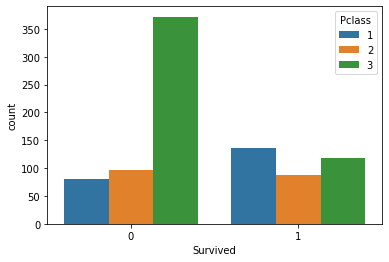

In [24]:
sns.countplot(x.Survived ,hue= "Pclass",data=x)

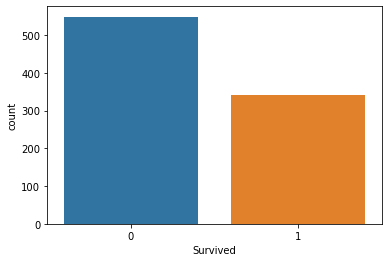

In [25]:
sns.countplot(x.Survived)

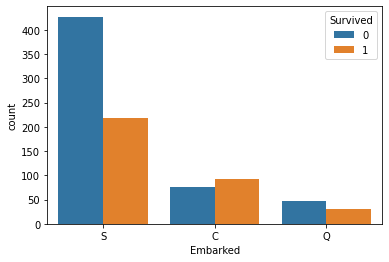

In [26]:
sns.countplot(x.Embarked,hue="Survived",data =x)

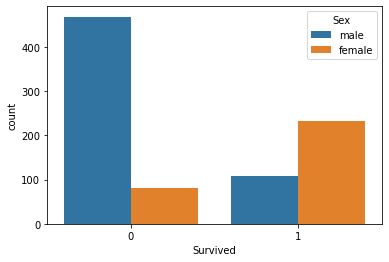

In [27]:
sns.countplot(x.Survived,hue="Sex",data=x)

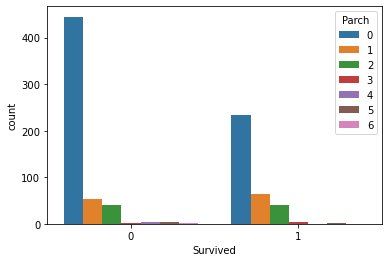

In [28]:
sns.countplot(x.Survived,hue="Parch",data=x)

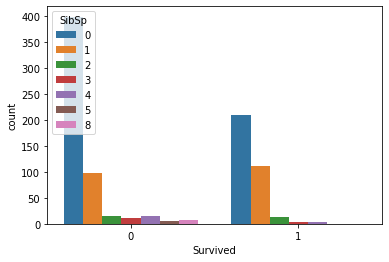

In [29]:
sns.countplot(x.Survived,hue="SibSp",data=x)

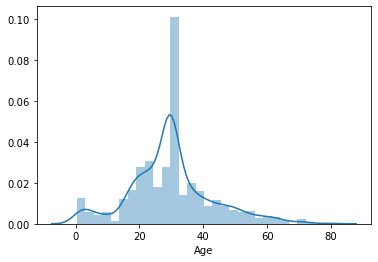

In [30]:
sns.distplot(x["Age"])

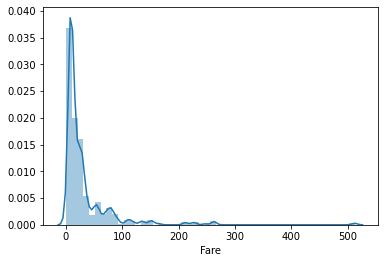

In [31]:
sns.distplot(x.Fare)

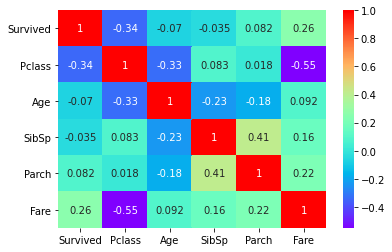

In [32]:
sns.heatmap(x.corr(),cmap="rainbow",annot=True)

Now lets drop some columns 

In [33]:
x.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked'],
      dtype='object')

In [34]:
x.drop(columns=['Parch', 'Ticket',  "Embarked" ],inplace=True)#we droped columns which are not need 

In [35]:
y.drop(columns=['Parch', 'Ticket',  "Embarked" ],inplace=True)

In [36]:
x=pd.get_dummies(x)#get dummies is function to convert catgorical data in numerical 

In [37]:
y=pd.get_dummies(y)

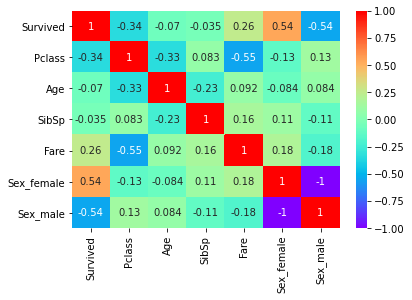

In [38]:
sns.heatmap(x.corr(),cmap="rainbow",annot=True)

Data is ready for giving in ml model 

In [39]:
from sklearn.model_selection import train_test_split#sklearn module to train and split 

In [40]:
target=x.Survived#assigning target value 

In [41]:
x.drop(columns=("Survived"),inplace=True)

In [42]:
x_train,x_test,target_train,target_test=train_test_split(x,target,random_state=0,test_size=0.30)

In [43]:
from sklearn.preprocessing import StandardScaler#sklearn preprocessing module for Std scaler 

In [44]:
std_scl=StandardScaler()

In [45]:
x=std_scl.fit_transform(x)

In [46]:
y=std_scl.fit_transform(y)

In [47]:
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [48]:
lr=LogisticRegression()
lrcv=LogisticRegressionCV()
rfc=RandomForestClassifier()
svc=SVC()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
nb=GaussianNB()


In [49]:
estimators=[('nb',nb),('dt',dt),('svc',svc),('rfc',rfc),('knn',knn)]

In [50]:
voting=VotingClassifier(estimators=estimators)

In [51]:
lr.fit(x_train,target_train)


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [52]:
lrcv.fit(x_train,target_train)

LogisticRegressionCV()

In [53]:
rfc.fit(x_train,target_train)

RandomForestClassifier()

In [54]:
svc.fit(x_train,target_train)

SVC()

In [55]:
knn.fit(x_train,target_train)

KNeighborsClassifier()

In [56]:
dt.fit(x_train,target_train)

DecisionTreeClassifier()

In [57]:
nb.fit(x_train,target_train)

GaussianNB()

Now we fited training data in model

In [58]:
from sklearn.metrics import accuracy_score#to check accy of our model we imported this function

In [59]:
result1=lr.predict(x_test)

In [60]:
accuracy_score(result1,target_test)

0.7985074626865671

In [61]:
result2=lrcv.predict(x_test)

In [62]:
accuracy_score(result2,target_test)

0.8022388059701493

In [63]:
result3=rfc.predict(x_test)

In [64]:
accuracy_score(target_test,result3)

0.8171641791044776

In [65]:
result4=svc.predict(x_test)

In [66]:
accuracy_score(result4,target_test)

0.7164179104477612

In [67]:
result5=knn.predict(x_test)

In [68]:
accuracy_score(result5,target_test)

0.7313432835820896

In [69]:
result6=dt.predict(x_test)

In [70]:
accuracy_score(result6,target_test)

0.8022388059701493

In [71]:
result7=nb.predict(x_test)

In [72]:
accuracy_score(result7,target_test)

0.7835820895522388

In [73]:
z=pd.read_csv("gender_submission.csv")

In [74]:
result=rfc.predict(y)

In [75]:
b={"PassengerId":z.PassengerId,"Survived":result}

In [76]:
data=pd.DataFrame(b)

In [77]:
data.to_csv("kagglesub.csv",index=False)#this is file that we will submit in competition  